# In this project our aim is to predict whether the cancer is benign or malignant


## Exploring the data

In [66]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib as plt

%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from time import time
from sklearn.metrics import accuracy_score
from sklearn.metrics import fbeta_score
import seaborn as sb

In [72]:
#Read the data
data=pd.read_csv("datasets_180_408_data.csv")
print(data.head())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [73]:
print(data.describe())

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

## Preparing The Data


In [74]:
#Last column contain only Nan values and its not useful
data.dropna(axis=1,inplace=True)
#"id" column has nothing to do with breast cancer so we can remove it
data.drop("id",axis=1,inplace=True)

In [75]:
# Diagonis is what we need to predict i.e. whether cancer is  benign or malignant so we need to remove this from input coluumn and put in output
diagnosis_raw=data["diagnosis"]
# we need to change this into 0 and 1 target label,malignant is taken as 1 and benign is taken as 0
output=diagnosis_raw.apply(lambda x:1 if (x=="M") else 0)
print(output)
df=data.drop("diagnosis",axis=1)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64


In [78]:
print(df.shape)

(569, 30)


## Transforming Skewed Continuous Features

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F426F16688>,
      dtype=object)

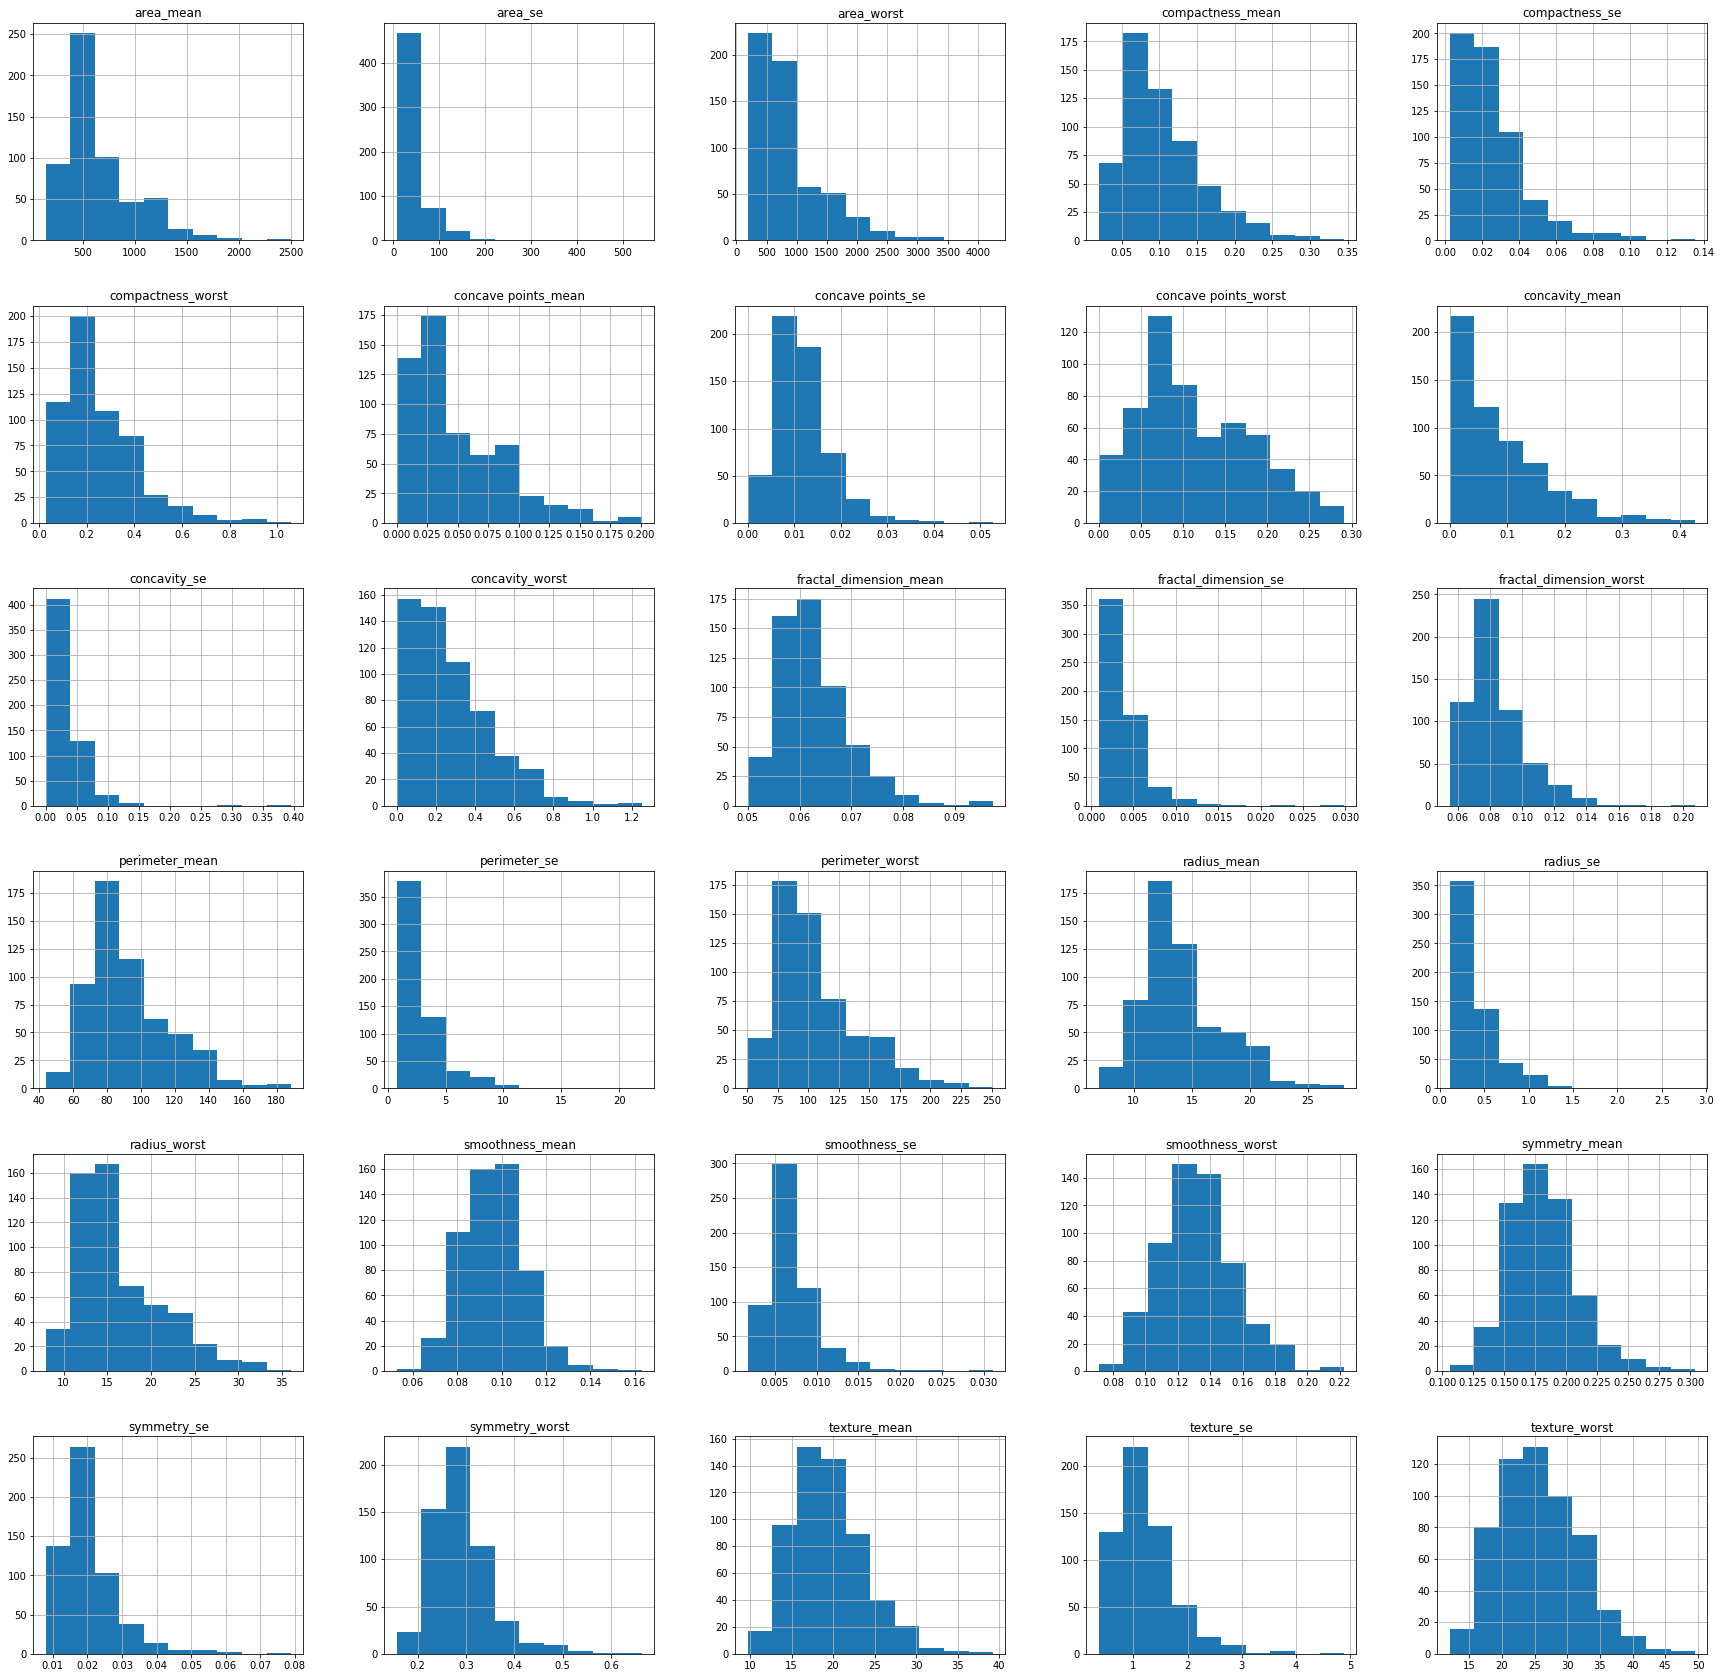

In [79]:
#Checking the skewness of columns by visualising through histogram
df.hist(figsize=(30,30))


In [80]:
# Checking skewness values
df.skew()


radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

In [81]:
# 1.5 skewness is taken as threshold skewness so that skewness from columns haveing skewness greater than 1.5 is removed
skewed_column=[]
for i in range(len(df.skew())):
    if df.skew()[i]>1.5:    
      print(df.skew()[i],df.skew().index[i])
      skewed_column.append(df.skew().index[i])

1.645732175624044 area_mean
3.0886121663847503 radius_se
1.6464438087530515 texture_se
3.443615202194907 perimeter_se
5.447186284898409 area_se
2.3144500566367534 smoothness_se
1.902220709637862 compactness_se
5.110463049043674 concavity_se
2.1951328995478185 symmetry_se
3.9239686202274204 fractal_dimension_se
1.8593732724433474 area_worst
1.6625792663955266 fractal_dimension_worst


In [82]:
# Log-transform the skewed features
df[skewed_column] = df[skewed_column].apply(lambda x: np.log(x + 1))
print(df.skew())

radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  0.287328
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  1.713417
texture_se                 0.629526
perimeter_se               1.025375
area_se                    0.847298
smoothness_se              2.283394
compactness_se             1.816278
concavity_se               4.231738
concave points_se          1.444678
symmetry_se                2.135874
fractal_dimension_se       3.874373
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 0.457614
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1.150237
concave points_worst       0

## Normalising Numerical Features of Data

In [83]:
scaler = MinMaxScaler() # default=(0, 1)
columns = df.columns
df[columns]=scaler.fit_transform(df[columns])

In [84]:
# look at the data after all pre-processing steps
print(df.describe())

       radius_mean  texture_mean  perimeter_mean   area_mean  smoothness_mean  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.488093         0.394785   
std       0.166787      0.145453        0.167915    0.169126         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.375255         0.304595   
50%       0.302381      0.308759        0.293345    0.470075         0.390358   
75%       0.416442      0.408860        0.416765    0.592919         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.

## Shuffle and Split Data

In [85]:

from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df, 
                                                    output,
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 455 samples.
Testing set has 114 samples.


## Evaluating Model Performance

## Implementation - Creating a Training and Predicting Pipelines

In [86]:
# beta value taken is higer as higher recall is the requirement of data
def train_predict(learner,X_train, y_train, X_test, y_test):
    results={}
    start=time()
    learner = learner.fit(X_train,y_train)
    end = time()
    results['train_time'] = end-start
    start = time() # Get start time
    predictions_train=learner.predict(X_train)
    predictions_test = learner.predict(X_test)
    end = time() 
    results['prediction_time']=end-start
    results['train_accuracy'] = accuracy_score(y_train,predictions_train)
    results['test_accuracy'] = accuracy_score(y_test,predictions_test)
    results['f_score']=fbeta_score(y_test,predictions_test, beta=2)
    return results

## Implementation: Initial Model Evaluation

In [87]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
model_A = DecisionTreeClassifier()
model_B = AdaBoostClassifier()
model_C = SVC()
print("DecisionTreeClassifier",train_predict(model_A,X_train, y_train, X_test, y_test))
print("AdaBoostClassifier",train_predict(model_B,X_train, y_train, X_test, y_test))
print("SVC",train_predict(model_C,X_train, y_train, X_test, y_test))


DecisionTreeClassifier {'train_time': 0.016953706741333008, 'prediction_time': 0.003990888595581055, 'train_accuracy': 1.0, 'test_accuracy': 0.9122807017543859, 'f_score': 0.9205020920502094}
AdaBoostClassifier {'train_time': 0.20245671272277832, 'prediction_time': 0.030917644500732422, 'train_accuracy': 1.0, 'test_accuracy': 0.956140350877193, 'f_score': 0.9401709401709403}
SVC {'train_time': 0.004985809326171875, 'prediction_time': 0.004988908767700195, 'train_accuracy': 0.9868131868131869, 'test_accuracy': 0.9649122807017544, 'f_score': 0.9574468085106385}


## Choosing The best Model

Out of Above three models, Time taken by SVC is least and accuracy and f_score are highest for test samples, hence its SVC is the best to use

## Implementation: Model Tuning

In [88]:
#Using Rbf Kernel
results_rbf=[]
gamma=[0.00001,0.5,1,2,5,10]
for i in range(len(gamma)):
    model=SVC(kernel='rbf',gamma=gamma[i])
    result_rbf=train_predict(model,X_train, y_train, X_test, y_test)
    results_rbf.append(result_rbf)
X=pd.DataFrame(results_rbf,index=gamma)
print(X)

          train_time  prediction_time  train_accuracy  test_accuracy   f_score
0.00001     0.015957         0.014958        0.637363       0.587719  0.000000
0.50000     0.005990         0.005979        0.975824       0.973684  0.961538
1.00000     0.003989         0.005985        0.986813       0.964912  0.957447
2.00000     0.004986         0.004987        0.986813       0.964912  0.957447
5.00000     0.007967         0.007979        0.991209       0.973684  0.961538
10.00000    0.013947         0.009972        0.993407       0.938596  0.932203


When kernel selected is Rbf, it can be seen that accuracy and precision of test increases as gamma value increases,but after a limit test accuracy start reducing due to overfitting. From the above results, it can be concluded that gamma=0.5 takes lesser time and give better accuracy and f_score values.

In [89]:
#Using polykernel
degree=[1,2,3,4,5]
results_poly=[]
for i in range(len(degree)):
    model=SVC(kernel='poly',degree=degree[i])
    result_poly=train_predict(model,X_train, y_train, X_test, y_test)
    results_poly.append(result_poly)
X=pd.DataFrame(results_poly,index=degree)
print(X)


   train_time  prediction_time  train_accuracy  test_accuracy   f_score
1    0.006981         0.006016        0.978022       0.964912  0.944206
2    0.004987         0.003988        0.989011       0.973684  0.974576
3    0.002997         0.003958        0.989011       0.973684  0.974576
4    0.004017         0.002994        0.993407       0.956140  0.966387
5    0.006950         0.001994        0.997802       0.929825  0.941423


When kernel is polynomial, Similar to Rbf it can be seen that as degree increases test accuracy increase only upto certain value as it tends to overfitting later. From the above results it can be concluded that degree 3 is best fit for this data, as time taken is lesser as well as accuracy, f_score is high

## Conclusion: SVC Model is best to use for data, If kernel used is Rbf then gamma =0.5 gives best result, while if kernel used is polynomial then degree=3 gives best result as both achieve almost 97% test accuracy and 96% F_Score

## Feature Selection

As SVC model does not have feature selection so lets use adaboost classifier for feature selection

In [90]:
model = AdaBoostClassifier().fit(X_train,y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importance = model.feature_importances_
for i,j in enumerate(importance):
    print(X_train.columns[i],j)

radius_mean 0.0
texture_mean 0.08
perimeter_mean 0.0
area_mean 0.0
smoothness_mean 0.04
compactness_mean 0.06
concavity_mean 0.02
concave points_mean 0.06
symmetry_mean 0.02
fractal_dimension_mean 0.0
radius_se 0.0
texture_se 0.04
perimeter_se 0.04
area_se 0.1
smoothness_se 0.0
compactness_se 0.04
concavity_se 0.02
concave points_se 0.0
symmetry_se 0.02
fractal_dimension_se 0.06
radius_worst 0.02
texture_worst 0.06
perimeter_worst 0.02
area_worst 0.1
smoothness_worst 0.04
compactness_worst 0.0
concavity_worst 0.06
concave points_worst 0.06
symmetry_worst 0.02
fractal_dimension_worst 0.02


As SVC model does not have feature selection so lets use adaboost classifier for feature selection

From the above results two feature which have maximum weights are area_se and area_worst of cell_nucleus

## Analysis for area_se feature

Lets plot a violinplot to understand threshold value of area_se which predict Belign and Malignant cancer

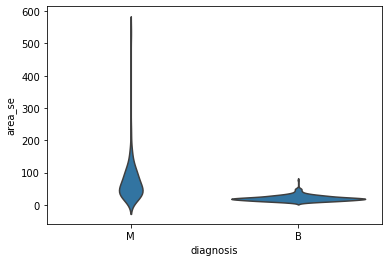

In [124]:
sb.violinplot(data=data,x=data['diagnosis'],y=data["area_se"],inner=None, color=sb.color_palette()[0])

It can be seen lower area_se is for benign cancer while Higher area_se is for malignant cancer

In [140]:
#Check how much percentage of people having benign cancer above certain area_se value
Malignant_analysis=[]
for i in range(7,70,2):
    Malignant_analysis.append(np.sum((data["area_se"]>=i) & (data['diagnosis']=='M'))/np.sum(data['area_se']>=i)*100)
X=pd.DataFrame(Malignant_analysis,columns=['% people having Malignant'])
X['area_se greater than']=np.arange(7,70,2)
X.set_index('area_se greater than',inplace=True)
print(X)

                      % people having Malignant
area_se greater than                           
7                                     37.323944
9                                     37.857143
11                                    38.899083
13                                    41.245136
15                                    43.478261
17                                    46.860987
19                                    51.629073
21                                    58.309038
23                                    62.700965
25                                    67.509025
27                                    71.764706
29                                    77.489177
31                                    82.325581
33                                    84.500000
35                                    88.524590
37                                    89.080460
39                                    90.532544
41                                    91.875000
43                                    92

In [108]:
#Check how much percentage of people having benign cancer below certain area_se value
Benign_analysis=[]
for i in range(7,70,2):
    Benign_analysis.append(np.sum((data["area_se"]<=i) & (data['diagnosis']=='B'))/np.sum(data['area_se']<=i)*100)
X=pd.DataFrame(Benign_analysis,columns=['% people having Benign'])
X['area_se lower than']=np.arange(7,70,2)
X.set_index('area_se lower than',inplace=True)
print(X)

                    % people having Benign
area_se lower than                        
7                               100.000000
9                               100.000000
11                              100.000000
13                              100.000000
15                               97.674419
17                               97.560976
19                               96.470588
21                               94.690265
23                               93.410853
25                               91.438356
27                               90.764331
29                               90.236686
31                               89.859155
33                               88.378378
35                               87.046632
37                               85.569620
39                               85.250000
41                               83.902439
43                               83.574879
45                               81.924883
47                               80.831409
49         

## From the above analysis ,it can be concluded that almost 96% of people having area_se greater than or equal to 49 have Malignant cancer and 97% of the people having area_se less than or equal to 17 have Benign cancer

## Analysis for area_worst feature

Lets plot a violinplot to understand threshold value of area_worst which predict Belign and Malignant cancer

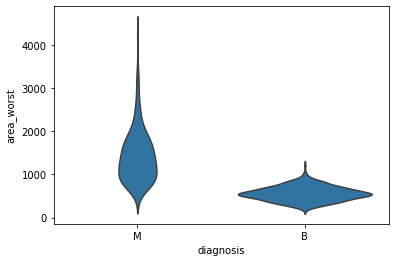

In [112]:
sb.violinplot(data=data,x=data['diagnosis'],y=data["area_worst"],inner=None, color=sb.color_palette()[0])

In [113]:
#Check how much percentage of people having malignant cancer above certain area_worst value
Malignant_analysis=[]
for i in range(50,1000,25):
    Malignant_analysis.append(np.sum((data["area_worst"]>=i) & (data['diagnosis']=='M'))/np.sum(data['area_worst']>=i)*100)
X=pd.DataFrame(Malignant_analysis,columns=['% people having Malignant'])
X['area_worst greater than']=np.arange(50,1000,25)
X.set_index('area_worst greater than',inplace=True)
print(X)

                         % people having Malignant
area_worst greater than                           
50                                       37.258348
75                                       37.258348
100                                      37.258348
125                                      37.258348
150                                      37.258348
175                                      37.258348
200                                      37.323944
225                                      37.389771
250                                      37.655417
275                                      37.992832
300                                      38.405797
325                                      38.970588
350                                      39.626168
375                                      40.769231
400                                      42.063492
425                                      43.002028
450                                      44.258873
475                            

In [122]:
#Check how much percentage of people having benign cancer below certain area_worst value
Benign_analysis=[]
for i in range(200,1100,50):
    Benign_analysis.append(np.sum((data["area_worst"]<=i) & (data['diagnosis']=='B'))/np.sum(data['area_worst']<=i)*100)
X=pd.DataFrame(Benign_analysis,columns=['% people having Benign'])
X['area_worst lower than']=np.arange(200,1100,50)
X.set_index('area_worst lower than',inplace=True)
print(X)

                       % people having Benign
area_worst lower than                        
200                                100.000000
250                                100.000000
300                                100.000000
350                                100.000000
400                                100.000000
450                                100.000000
500                                100.000000
550                                 98.918919
600                                 97.807018
650                                 98.113208
700                                 97.297297
750                                 95.440729
800                                 93.103448
850                                 90.691489
900                                 89.487179
950                                 87.407407
1000                                85.096154
1050                                83.764706


## From the above analysis ,it can be concluded that almost 98% of people having area_worst greater than or equal to 950 have Malignant cancer and 98% of the people having area_worst lesser than or equal to 650 have Benign cancer